In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [87]:
inc_=pd.read_csv("../Datasets/income.csv")
inc_

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
# we're gonna group perople based on their age and income

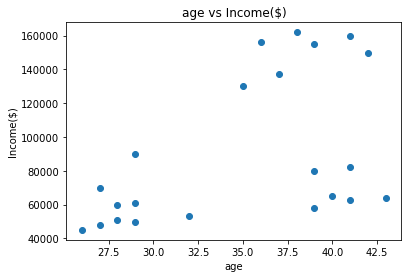

In [88]:
plt.scatter(inc_['Age'],inc_['Income($)'])
plt.xlabel('age')
plt.ylabel('Income($)')
plt.title("age vs Income($)")
plt.show()

In [89]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='random')
y_pred=km.fit_predict(inc_[['Age','Income($)']])
y_pred
# By default the Init is K means ++
# if k not provided then it will choose it as 8

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [90]:
inc_['Cluster']=y_pred
inc_

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [14]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [91]:
inc1=inc_[inc.Cluster==0]
inc2=inc_[inc.Cluster==1]
inc3=inc_[inc.Cluster==2]
inc1

,Name,Age,Income($),Cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


In [18]:
inc2

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
19,Alia,39,80000,1
20,Sid,41,82000,1


In [19]:
# inc3
inc3

,Name,Age,Income($),Cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


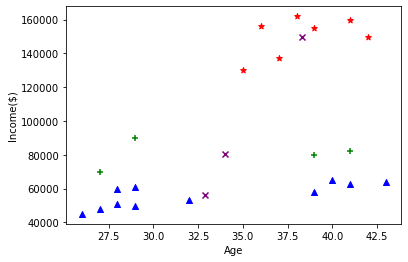

In [92]:
plt.scatter(inc1['Age'],inc1['Income($)'],marker='*',c='red')
plt.scatter(inc2['Age'],inc2['Income($)'],marker='+',c='green')
plt.scatter(inc3['Age'],inc3['Income($)'],marker='^',c='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',c='purple')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [97]:
# Preprocessing with MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(inc_[['Age']])
inc['Age']=scale.transform(inc_[['Age']])
scale.fit(inc_[['Income($)']])
inc['Income($)']=scale.transform(inc_[['Income($)']])

In [99]:
inc

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [100]:
inc

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [101]:
km=KMeans(n_clusters=3,init='random')
y_pred=km.fit_predict(inc[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [102]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [103]:
inc1=inc[inc.Cluster==0]
inc2=inc[inc.Cluster==1]
inc3=inc[inc.Cluster==2]
inc1

,Name,Age,Income($),Cluster
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0
10,Donald,0.647059,0.786325,0


In [104]:
inc2

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
19,Alia,0.764706,0.299145,1
20,Sid,0.882353,0.316239,1


In [105]:
inc3
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

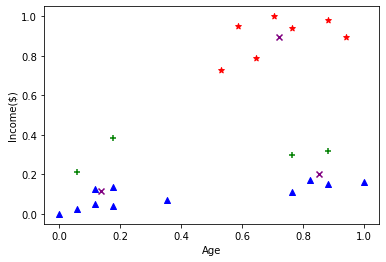

In [106]:
plt.scatter(inc1.Age,inc1['Income($)'],marker='*',c='red')
plt.scatter(inc2.Age,inc2['Income($)'],marker='+',c='green')
plt.scatter(inc3.Age,inc3['Income($)'],marker='^',c='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',c='purple')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [83]:
# Elbow Plot

In [107]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k,init='random')
    km.fit(inc[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


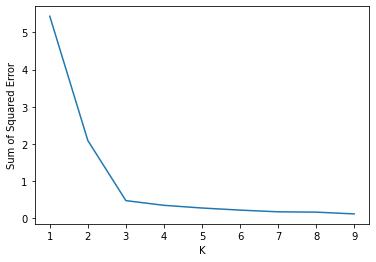

In [108]:
plt.xlabel('K')
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)
plt.show()

In [110]:
# k can be referenced from here that after values of 3 is the values get stablished
# flattening Occurs from 3

In [111]:
# Using Iris Dataset

In [114]:
from sklearn.datasets import load_iris
iris=load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [116]:
irisdf=pd.DataFrame(iris['data'],columns=iris.feature_names)
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [125]:
irisdata=irisdf.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
irisdata

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


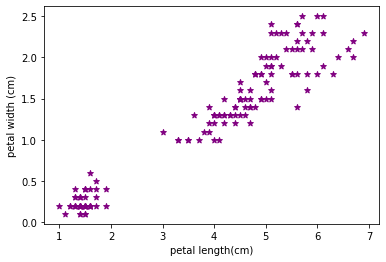

In [128]:
plt.scatter(irisdata['petal length (cm)'],irisdata['petal width (cm)'],marker='*',color='purple')
plt.xlabel('petal length(cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [132]:
scale = MinMaxScaler()
scale.fit(irisdata[['petal length (cm)']])
irisdata['petal length (cm)']=scale.transform(irisdata[['petal length (cm)']])
scale.fit(irisdata[['petal width (cm)']])
irisdata['petal width (cm)']=scale.transform(irisdata[['petal width (cm)']])

In [133]:
irisdata

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [158]:
km_iris=KMeans(n_clusters=3,init='random')
y_pred=km_iris.fit_predict(irisdata[['petal length (cm)','petal width (cm)']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [146]:
km_iris.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

In [152]:
ssei=[]
k_rng=range(1,10)
for k in k_rng:
    kni=KMeans(n_clusters=k,init='random')
    kni.fit(irisdata[['petal length (cm)','petal width (cm)']])
    ssei.append(kni.inertia_)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [153]:
ssei

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6795297632254395,
 0.6099487278132557,
 0.4961968066144403,
 0.4592204762331242]

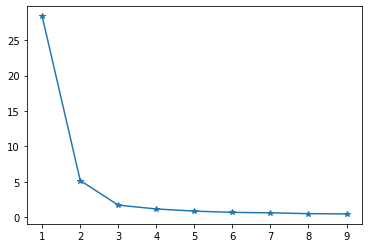

In [154]:
plt.plot(k_rng,ssei,marker='*')

In [159]:
# Elbow plot inferenced us with the value 3:
km_iris.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

In [161]:
irisdata["cluster"]=y_pred
irisdata

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [164]:
iris1=irisdata[irisdata.cluster==0]
iris2=irisdata[irisdata.cluster==1]
iris3=irisdata[irisdata.cluster==2]
iris1

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
5,0.118644,0.125000,0
6,0.067797,0.083333,0
7,0.084746,0.041667,0
8,0.067797,0.041667,0
9,0.084746,0.000000,0


In [165]:
iris2

,petal length (cm),petal width (cm),cluster
70,0.644068,0.708333,1
77,0.677966,0.666667,1
100,0.847458,1.000000,1
101,0.694915,0.750000,1
102,0.830508,0.833333,1
103,0.779661,0.708333,1
104,0.813559,0.875000,1
105,0.949153,0.833333,1
107,0.898305,0.708333,1
108,0.813559,0.708333,1


In [166]:
iris3

,petal length (cm),petal width (cm),cluster
50,0.627119,0.541667,2
51,0.593220,0.583333,2
52,0.661017,0.583333,2
53,0.508475,0.500000,2
54,0.610169,0.583333,2
55,0.593220,0.500000,2
56,0.627119,0.625000,2
57,0.389831,0.375000,2
58,0.610169,0.500000,2
59,0.491525,0.541667,2


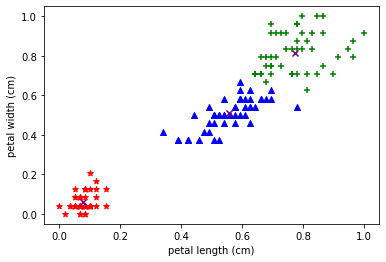

In [168]:
plt.scatter(iris1['petal length (cm)'],iris1['petal width (cm)'],marker='*',c='red')
plt.scatter(iris2['petal length (cm)'],iris2['petal width (cm)'],marker='+',c='green')
plt.scatter(iris3['petal length (cm)'],iris3['petal width (cm)'],marker='^',c='blue')
plt.scatter(km_iris.cluster_centers_[:,0],km_iris.cluster_centers_[:,1],marker='x',c='purple')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()